In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

In [112]:
car_df = pd.read_csv(r"C:\Users\mdgha\Downloads\Car price\carprice.csv")
car_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [113]:
car_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [114]:
car_df.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [115]:
car_df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '129', '115', '93', '142', '161', '153', '125', '128', '122',
       '103', '168', '108', '194', '231', '119', '154', '74', '186',
       '150', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

There is a '?' in the array, so performing Data preprocessing to remove '?' and replace it with the mean value.

In [116]:
car_df['normalized-losses'].replace('?', np.nan, inplace=True)
car_df['normalized-losses'] = pd.to_numeric(car_df['normalized-losses'])

car_df['normalized-losses'].fillna(car_df['normalized-losses'].mean(), inplace=True)
car_df['normalized-losses'].unique()

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\590493433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df['normalized-losses'].replace('?', np.nan, inplace=True)
C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\590493433.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

array([121.3, 164. , 158. , 192. , 188. , 121. ,  98. ,  81. , 118. ,
       148. , 110. , 145. , 137. , 101. ,  78. , 106. ,  85. , 107. ,
       104. , 113. , 129. , 115. ,  93. , 142. , 161. , 153. , 125. ,
       128. , 122. , 103. , 168. , 108. , 194. , 231. , 119. , 154. ,
        74. , 186. , 150. ,  83. , 102. ,  89. ,  87. ,  77. ,  91. ,
       134. ,  65. , 197. ,  90. ,  94. , 256. ,  95. ])

In [117]:
car_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [118]:
def set_other(row):
    car_with_other = []
    for i in row:
        if i=='toyota' or i=='nissan' or i=='honda' or i=='mitsubishi':
            car_with_other.append(i)
        else:
            car_with_other.append('other')

    return car_with_other

In [119]:
other = set_other(car_df.make)
other_set = list(set(other))

cnt = []
for i in other_set:
    cnt.append(other.count(i))
    

In [120]:
cnt

[13, 13, 18, 123, 32]

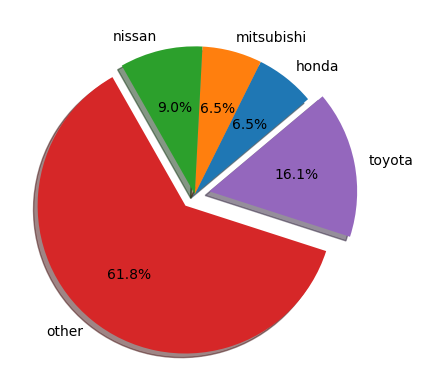

In [51]:
fig, ax = plt.subplots()

ax.pie(cnt, labels=other_set, autopct='%1.1f%%', explode=(0,0,0,0.1,0.1), shadow=True, startangle=40)
plt.show()

**Toyota** has the largest market share among car manufacturers

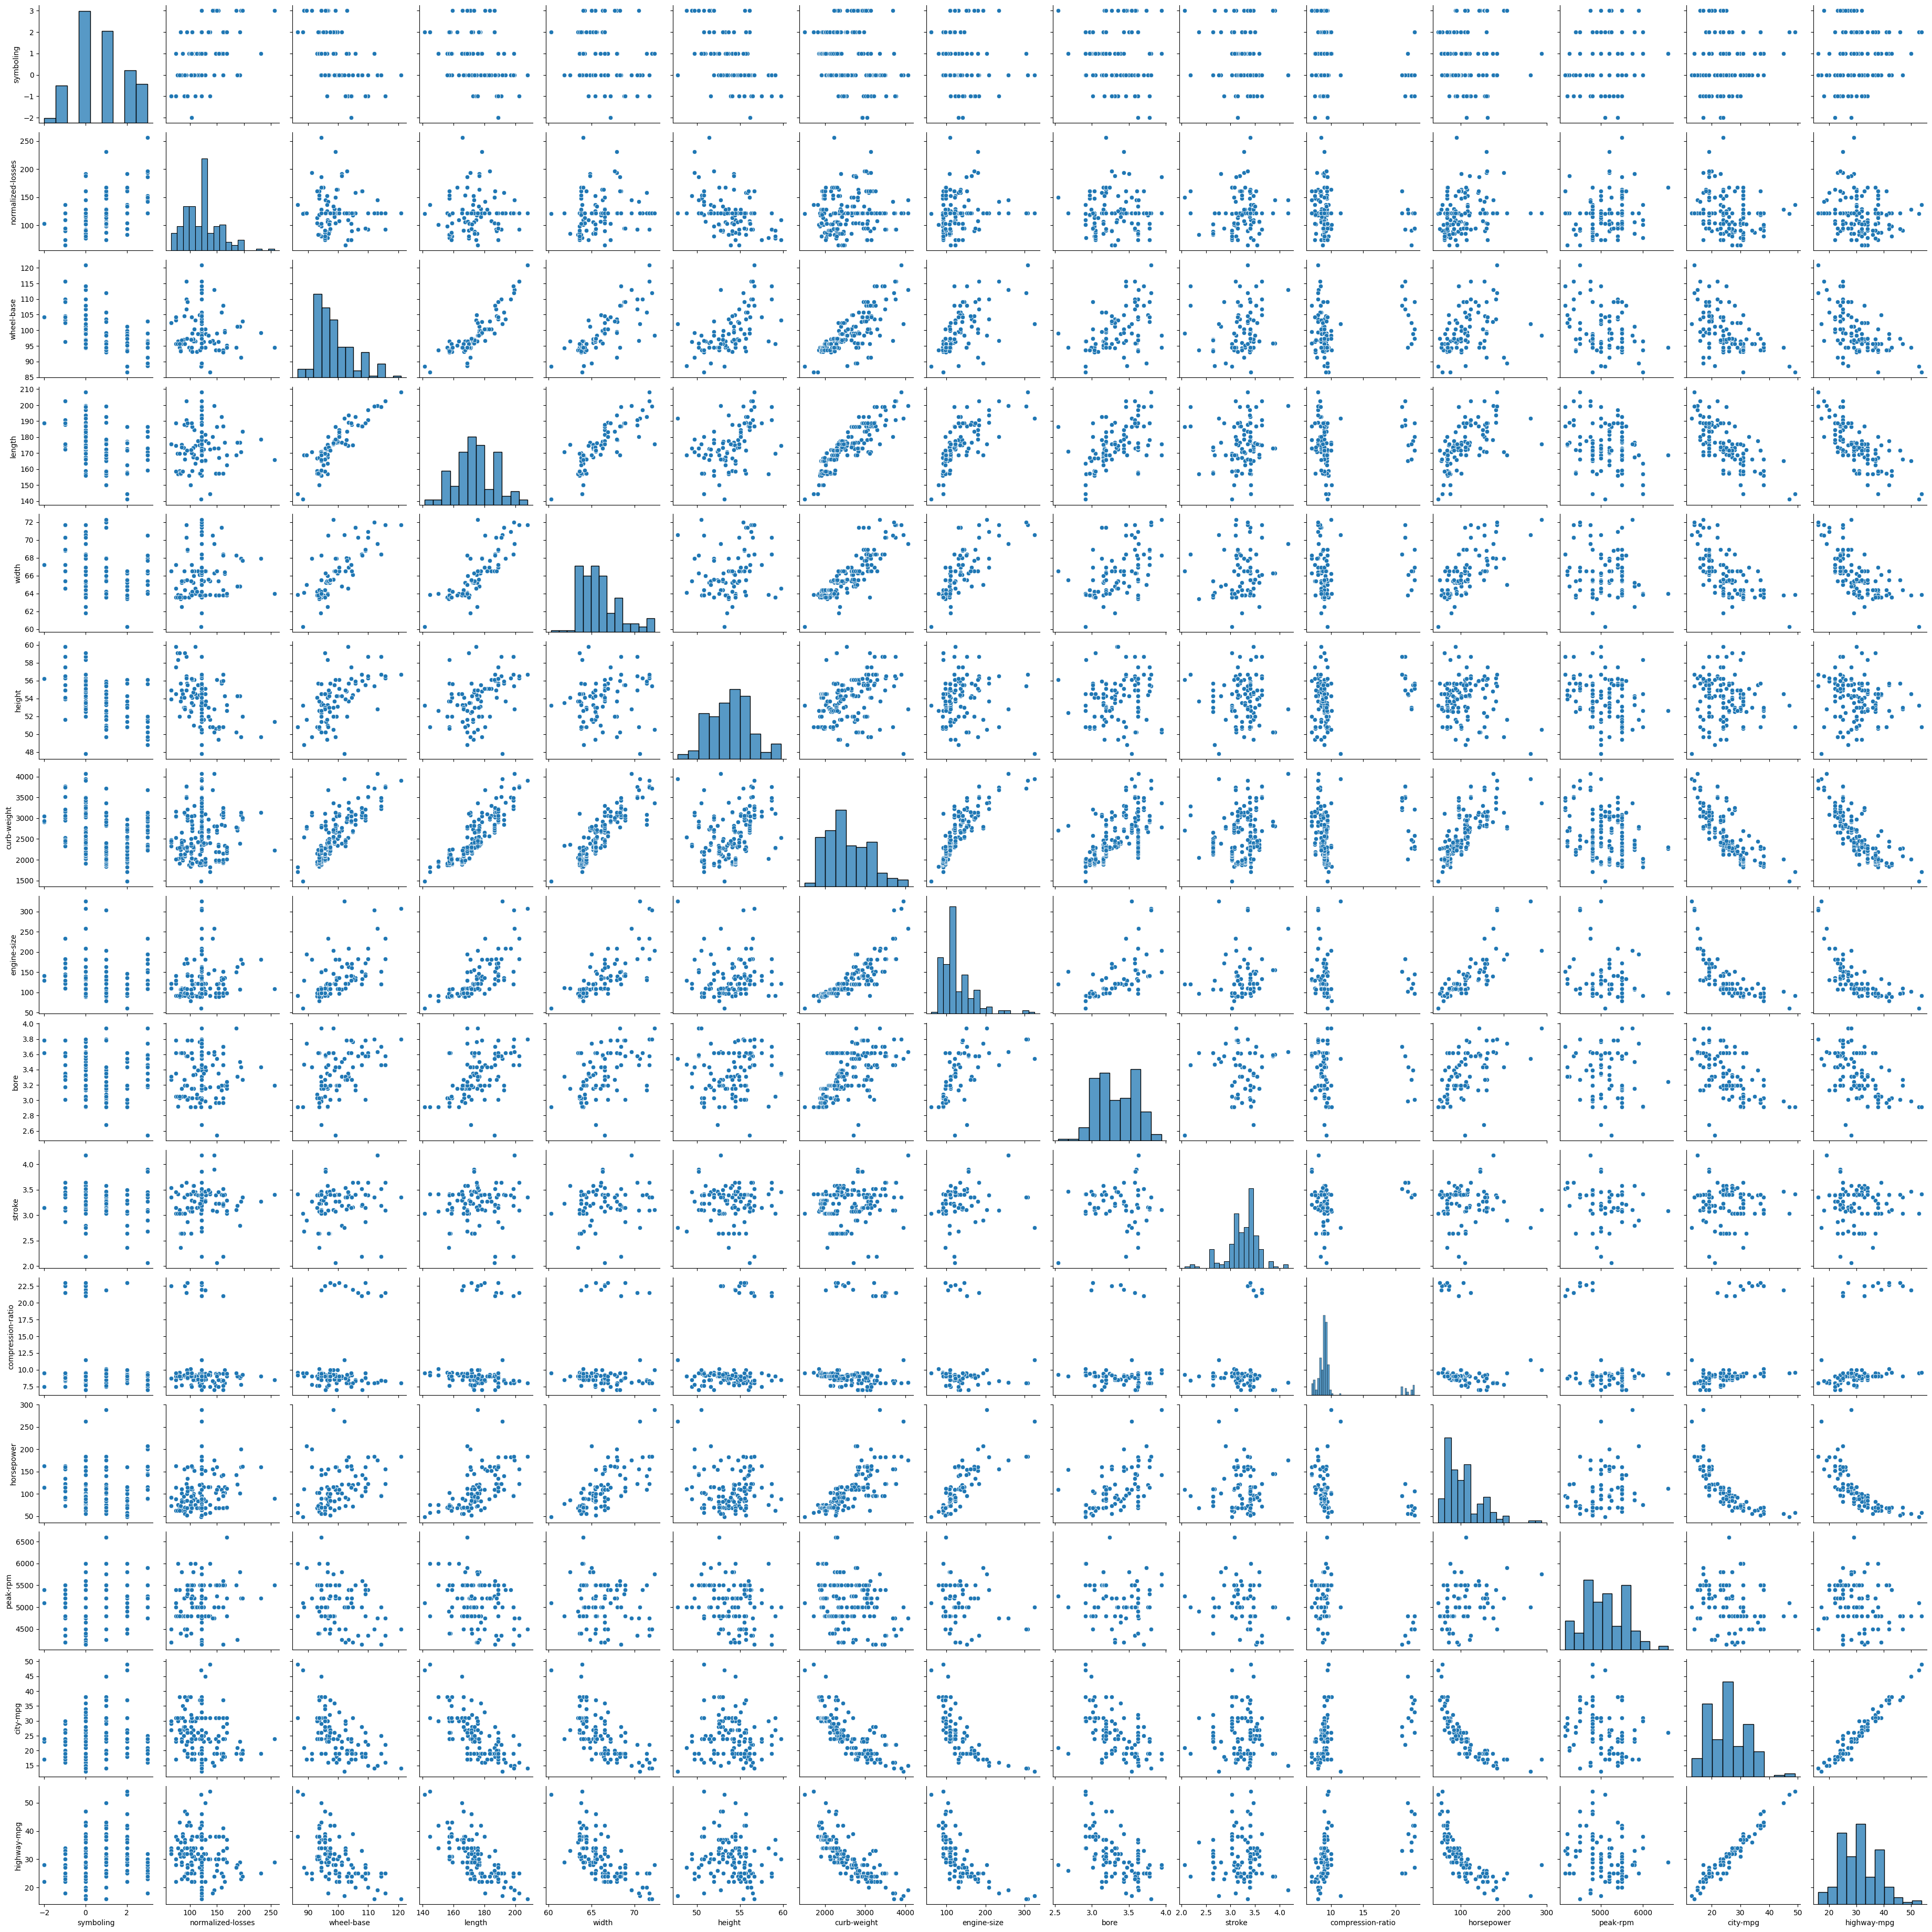

In [53]:
sns.pairplot(car_df)

In [62]:
fuels = list(car_df['fuel-type'].unique())
cnt = []

for i in fuels:
    cnt.append(list(car_df['fuel-type']).count(i))

[179, 20]

<BarContainer object of 2 artists>

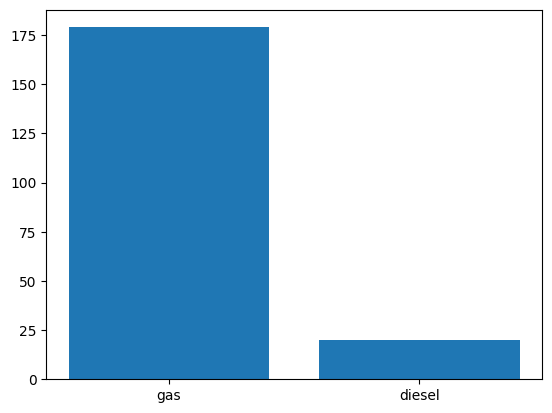

In [64]:
plt.bar(fuels, cnt)

People prefer cars with **gas** over **diesel**

In [65]:
car_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [121]:
car_df['num-of-doors'] = car_df['num-of-doors'].replace('?', np.nan)
car_df['num-of-doors'] = car_df['num-of-doors'].replace('two', 2)
car_df['num-of-doors'] = car_df['num-of-doors'].replace('four', 4)

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\3445401968.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df['num-of-doors'] = car_df['num-of-doors'].replace('four', 4)


In [122]:
car_df['num-of-doors'] = pd.to_numeric(car_df['num-of-doors'])

In [123]:
car_df['num-of-doors'].fillna(4, inplace=True)

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\1911764069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df['num-of-doors'].fillna(4, inplace=True)


In [124]:
car_df = car_df.replace('?', np.nan)

In [125]:
car_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [130]:
car_df.dropna(subset=['price'], inplace=True)

In [132]:
car_df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [160]:
car_df.price = car_df.price.astype(int)

In [162]:
car_df.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,121.300000,3.169231,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,32.231252,0.988113,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,96.500000,2.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,121.300000,4.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,135.500000,4.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Removing Outliers using the **Percentile** method

In [163]:
# Define a function to remove outliers based on percentiles
def remove_outliers(df, features):
    for feature in features:
        q1 = df[feature].quantile(0.01)  # 1st percentile
        q99 = df[feature].quantile(0.99)  # 99th percentile
        df = df[(df[feature] >= q1) & (df[feature] <= q99)]
    return df


In [164]:
features= ['normalized-losses', 'curb-weight', 'engine-size', 'compression-ratio', 'price']

car_df2 = remove_outliers(car_df, features)

In [166]:
car_df2.shape

(182, 26)

In [178]:
car_df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.3,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.3,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [179]:
from sklearn.decomposition import PCA

In [189]:
samp = car_df2.copy()
uni = samp['fuel-type'].unique()
for u, i in zip(uni, range(1, len(uni)+1)):
    samp['fuel-type'] = samp['fuel-type'].replace(u, i)

car_df2['fuel-type'].unique()

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\471281771.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  samp['fuel-type'] = samp['fuel-type'].replace(u, i)


array(['gas', 'diesel'], dtype=object)

Creating a Dictionary with feature names with a nested dictionary, which has the unique string value and it's corresponding numerical value 

In [190]:
def encode(df, features):
    encoded_dict = {}
    for f in features:
        encoded_dict[f] = {}
        uni_feat = df[f].unique()
        for u, i in zip(uni_feat, range(1, len(uni_feat)+1)):
            encoded_dict[f][u] = i

    return encoded_dict

In [191]:
car_df2.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [196]:
str_to_num = {
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8
}

for key in list(str_to_num.keys()):
    car_df2['num-of-cylinders'] = car_df2['num-of-cylinders'].replace(key, str_to_num[key])

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\1168967788.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df2['num-of-cylinders'] = car_df2['num-of-cylinders'].replace(key, str_to_num[key])


In [198]:
car_df2['num-of-cylinders'].unique()

array([4, 6, 5, 8], dtype=int64)

In [200]:
features = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-type']

Creating a dictionary, instead of **LabelEncoder()** or **OneHotEncoder()** to stores the encoded value with actual value

In [201]:
encoded_dict = encode(car_df2, features)

In [202]:
encoded_dict

{'make': {'alfa-romero': 1,
  'audi': 2,
  'bmw': 3,
  'chevrolet': 4,
  'dodge': 5,
  'honda': 6,
  'isuzu': 7,
  'mazda': 8,
  'mercedes-benz': 9,
  'mercury': 10,
  'mitsubishi': 11,
  'nissan': 12,
  'peugot': 13,
  'plymouth': 14,
  'porsche': 15,
  'saab': 16,
  'subaru': 17,
  'toyota': 18,
  'volkswagen': 19,
  'volvo': 20},
 'fuel-type': {'gas': 1, 'diesel': 2},
 'aspiration': {'std': 1, 'turbo': 2},
 'body-style': {'convertible': 1,
  'hatchback': 2,
  'sedan': 3,
  'wagon': 4,
  'hardtop': 5},
 'drive-wheels': {'rwd': 1, 'fwd': 2, '4wd': 3},
 'engine-location': {'front': 1, 'rear': 2},
 'fuel-system': {'mpfi': 1,
  '2bbl': 2,
  'mfi': 3,
  '1bbl': 4,
  'spfi': 5,
  'idi': 6,
  'spdi': 7},
 'engine-type': {'dohc': 1, 'ohcv': 2, 'ohc': 3, 'l': 4, 'ohcf': 5}}

In [204]:
for feature in list(encoded_dict.keys()):
    uni = car_df2[feature].unique()
    for key, val in list(encoded_dict[feature].items()):
        car_df2[feature] = car_df2[feature].replace(key, val)


car_df2

C:\Users\mdgha\AppData\Local\Temp\ipykernel_24828\2413462822.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df2[feature] = car_df2[feature].replace(key, val)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.3,1,1,1,2.0,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.3,1,1,1,2.0,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.3,1,1,1,2.0,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,2,1,1,4.0,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,2,1,1,4.0,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95.0,20,1,2,4.0,3,1,1,109.1,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95.0,20,2,2,4.0,3,1,1,109.1,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470


In [206]:
X = car_df2.drop(columns = ['price'])
y = car_df2.price

In [209]:
X.shape

(182, 25)

In [217]:
car_df2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,121.3,1,1,1,2.0,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,13495
1,3,121.3,1,1,1,2.0,1,1,1,88.6,...,130,1,3.47,2.68,9.0,111,5000,21,27,16500
2,1,121.3,1,1,1,2.0,2,1,1,94.5,...,152,1,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,2,1,1,4.0,3,2,1,99.8,...,109,1,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,2,1,1,4.0,3,3,1,99.4,...,136,1,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,141,1,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95.0,20,1,2,4.0,3,1,1,109.1,...,141,1,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,173,1,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95.0,20,2,2,4.0,3,1,1,109.1,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470


Selecting features based on how strongly related they are to the price of a car.

In [237]:
x2 = car_df2.drop(columns='price')
x2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,121.3,1,1,1,2.0,1,1,1,88.6,...,4,130,1,3.47,2.68,9.0,111,5000,21,27
1,3,121.3,1,1,1,2.0,1,1,1,88.6,...,4,130,1,3.47,2.68,9.0,111,5000,21,27
2,1,121.3,1,1,1,2.0,2,1,1,94.5,...,6,152,1,2.68,3.47,9.0,154,5000,19,26
3,2,164.0,2,1,1,4.0,3,2,1,99.8,...,4,109,1,3.19,3.40,10.0,102,5500,24,30
4,2,164.0,2,1,1,4.0,3,3,1,99.4,...,5,136,1,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,4,141,1,3.78,3.15,9.5,114,5400,23,28
195,-1,95.0,20,1,2,4.0,3,1,1,109.1,...,4,141,1,3.78,3.15,8.7,160,5300,19,25
196,-1,95.0,20,1,1,4.0,3,1,1,109.1,...,6,173,1,3.58,2.87,8.8,134,5500,18,23
197,-1,95.0,20,2,2,4.0,3,1,1,109.1,...,6,145,6,3.01,3.40,23.0,106,4800,26,27


In [219]:
for i in list(car_df2.columns)[:-1]:
    print(f"{i} - {car_df2['price'].corr(car_df2[i])}")

symboling - -0.02480179142634379
normalized-losses - 0.1459602259644233
make - -0.11646439113429713
fuel-type - 0.16852742249387562
aspiration - 0.26897113139232987
num-of-doors - 0.05669641347816068
body-style - 0.1183918072959103
drive-wheels - -0.5836517710595349
engine-location - 0.42229720670176035
wheel-base - 0.5010631015357085
length - 0.6395073150350756
width - 0.7116103468070363
height - 0.19404045497262815
curb-weight - 0.8038973351260313
engine-type - -0.039616905849134694
num-of-cylinders - 0.7012020582730668
engine-size - 0.8544798266749857
fuel-system - -0.08993016882377702
bore - 0.5165645570015615
stroke - -0.0023778401620298483
compression-ratio - 0.13180582531047344
horsepower - 0.7740200326317521
peak-rpm - -0.054872010313569475
city-mpg - -0.6904273843505215
highway-mpg - -0.6928867979266028


In [220]:
X = car_df2[['make', 'fuel-type', 'drive-wheels', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'num-of-cylinders', 'horsepower', 'city-mpg', 'highway-mpg']]

In [221]:
X.shape

(182, 12)

In [227]:
from sklearn.model_selection import GridSearchCV

**GridSearchCV** is used to make our ***Hyper-parameter Tuning*** task easier

In [240]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x2, y)

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

Listing all the ML models with their parameters for Hyper-parameter Tuning

In [233]:
algo = {
    'linear-regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },

    'lasso-regression': {
        'model': Lasso(),
        'params': {
            'alpha': [1, 2],
            'selection': ['random', 'cyclic']
        }
    },

    'decision-tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['mse', 'friedman_mse'],
            'splitter': ['best', 'random']
        }
    }
}

In [243]:
from sklearn.model_selection import ShuffleSplit

kf = ShuffleSplit(n_splits=5, test_size=0.2)

In [248]:
scores = []

for model, config in algo.items():
    gs = GridSearchCV(config['model'], config['params'], cv=kf, return_train_score=False)
    gs.fit(X, y)
    scores.append({
        'model': model,
        'best_param': gs.best_params_,
        'best_score': gs.best_score_
    })

score_df = pd.DataFrame(scores)

C:\Users\mdgha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdgha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdgha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\mdgha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Finding the best parameter for each ML model

In [249]:
score_df

,model,best_param,best_score
0,linear-regression,{'fit_intercept': True},0.808129
1,lasso-regression,"{'alpha': 2, 'selection': 'random'}",0.714762
2,decision-tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.842065


**DecisionTreeRegressor()** with parameters *criterion= friedman_mse* and *splitter = random* gives the best score

In [251]:
model = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [252]:
model.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [253]:
import pickle

In [254]:
with open('car_price_prediction_model', 'wb') as f:
    pickle.dump(model, f)

In [256]:
samp['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [259]:
X['num-of-cylinders'].unique()

array([4, 6, 5, 8], dtype=int64)

In [260]:
X

,make,fuel-type,drive-wheels,wheel-base,length,width,curb-weight,engine-size,num-of-cylinders,horsepower,city-mpg,highway-mpg
0,1,1,1,88.6,168.8,64.1,2548,130,4,111,21,27
1,1,1,1,88.6,168.8,64.1,2548,130,4,111,21,27
2,1,1,1,94.5,171.2,65.5,2823,152,6,154,19,26
3,2,1,2,99.8,176.6,66.2,2337,109,4,102,24,30
4,2,1,3,99.4,176.6,66.4,2824,136,5,115,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...
194,20,1,1,109.1,188.8,68.9,2952,141,4,114,23,28
195,20,1,1,109.1,188.8,68.8,3049,141,4,160,19,25
196,20,1,1,109.1,188.8,68.9,3012,173,6,134,18,23
197,20,2,1,109.1,188.8,68.9,3217,145,6,106,26,27


In [264]:
X['curb-weight'].mean()

2536.2087912087914